In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv('indian_liver_patient.csv')

In [4]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
dataset.shape

(583, 11)

In [7]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [9]:
dataset.duplicated().sum()

13

In [10]:
dataset=dataset.drop_duplicates()
print(dataset.shape)

(570, 11)


**Checking Missing Values**

In [11]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

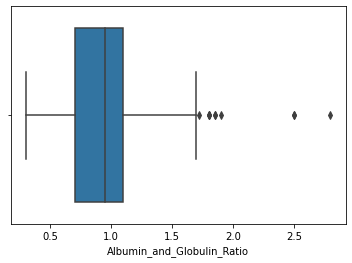

In [12]:
sns.boxplot(data=dataset,x='Albumin_and_Globulin_Ratio')

In [13]:
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
dtype: float64

In [14]:
dataset['Albumin_and_Globulin_Ratio'].median()

0.95

In [15]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689044

In [16]:
dataset['Albumin_and_Globulin_Ratio']=dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [17]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

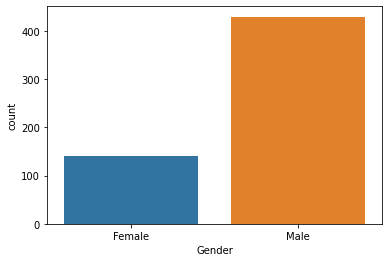

In [18]:
import seaborn as sns
sns.countplot(data=dataset,x='Gender',label='count')

In [19]:
Male,Female=dataset['Gender'].value_counts()
print('Number of patients that are male:',Male)
print('Number of patients that are female:',Female)

Number of patients that are male: 430
Number of patients that are female: 140


**Encoding the Gender Column**

In [20]:
def partition(x):
  if x=='Male':
    return 1
  return 0
dataset['Gender']=dataset['Gender'].map(partition)

In [21]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [22]:
def partition(x):
  if x==2:
    return 0
  return 1
dataset['Dataset']=dataset['Dataset'].map(partition)

**Correlation Matrix**

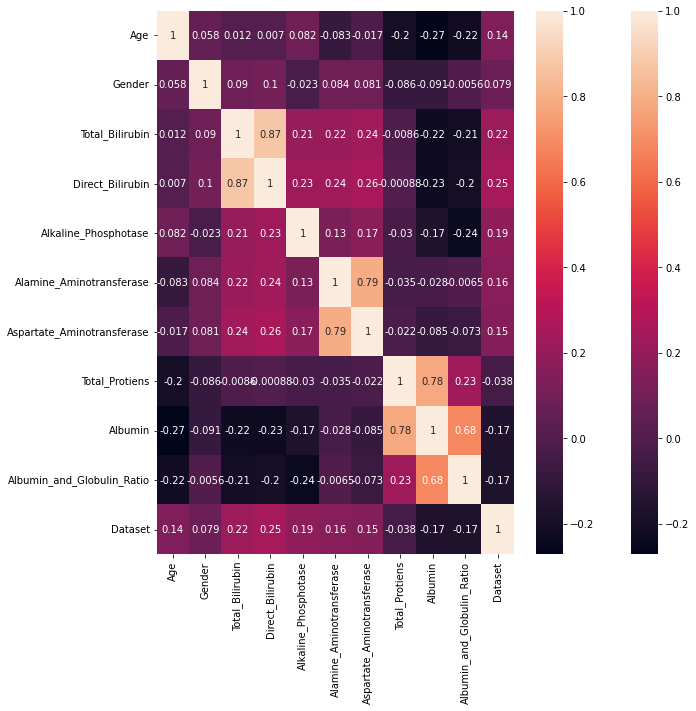

In [29]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())
sns.heatmap(corr,annot=True)

**Data Preparation**

In [40]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [41]:
#splitting data in to training data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(427, 10)
(427,)
(143, 10)
(143, 10)


In [42]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
#minmax scaling on traindata
minmax_scale=MinMaxScaler()
minmax_scale.fit(x_train)
df_exp_minmax=minmax_scale.transform(x_train)
print(type(df_exp_minmax))
df_exp_minmax_new=pd.DataFrame(df_exp_minmax,columns=['age','gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Alamine_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'])
df_exp_minmax_new

<class 'numpy.ndarray'>


,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.567901,0.0,0.028369,0.025510,0.179287,0.010778,0.004472,0.594203,0.565217,0.28
1,0.592593,1.0,0.002364,0.000000,0.056180,0.009581,0.003456,0.550725,0.586957,0.36
2,0.518519,1.0,0.210402,0.260204,0.100147,0.006587,0.010775,0.536232,0.413043,0.20
3,0.493827,1.0,0.007092,0.005102,0.132877,0.082635,0.015450,0.420290,0.456522,0.32
4,0.790123,1.0,0.030733,0.020408,0.042990,0.004790,0.002440,0.550725,0.673913,0.52
...,...,...,...,...,...,...,...,...,...,...
422,0.333333,1.0,0.009456,0.005102,0.222277,0.107186,0.001423,0.376812,0.304348,0.16
423,0.864198,1.0,0.002364,0.000000,0.102101,0.008383,0.017890,0.333333,0.239130,0.12
424,0.172840,1.0,0.018913,0.030612,0.123596,0.000000,0.002236,0.478261,0.260870,0.08
425,0.543210,0.0,0.007092,0.005102,0.038593,0.009581,0.003049,0.478261,0.369565,0.16


In [53]:
##minmax scaling on testdata
x_test_minmax=minmax_scale.transform(x_test)
print(type(x_test_minmax))
df_test_minmax_new=pd.DataFrame(x_test_minmax,columns=['age','gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Alamine_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'])

df_test_minmax_new

<class 'numpy.ndarray'>


,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.716049,1.0,0.030733,0.040816,0.078652,0.035329,0.029478,0.855072,0.673913,0.200
1,0.308642,0.0,0.004728,0.000000,0.048363,0.025150,0.006302,0.362319,0.347826,0.240
2,0.135802,1.0,0.007092,0.005102,0.154861,0.008982,0.011384,0.492754,0.608696,0.480
3,0.543210,1.0,0.004728,0.005102,0.070835,0.002994,0.004066,0.275362,0.260870,0.200
4,0.851852,1.0,0.030733,0.040816,0.076698,0.005988,0.006709,0.550725,0.456522,0.200
...,...,...,...,...,...,...,...,...,...,...
138,0.691358,1.0,0.111111,0.117347,0.051295,0.069461,0.039032,0.594203,0.434783,0.160
139,0.666667,1.0,-0.002364,0.000000,0.018075,0.029341,0.023582,0.231884,0.347826,0.440
140,0.555556,1.0,0.018913,0.015306,0.069858,0.011976,0.003049,0.478261,0.478261,0.304
141,0.444444,0.0,0.009456,0.010204,0.112360,0.132934,0.047774,0.594203,0.478261,0.200


**Machine Learning Models**

Logistic Regession

In [55]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(random_state=0)
log_classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [56]:
#predicting the output
log_y_pred=log_classifier.predict(x_test)

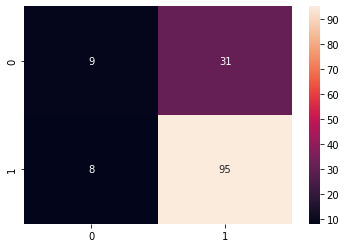

In [57]:
from sklearn.metrics import confusion_matrix
log_cm=confusion_matrix(y_test,log_y_pred)
sns.heatmap(log_cm,annot=True)

**accuracy,precision,recall,f1_score**

In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test,log_y_pred))
print(recall_score(y_test,log_y_pred))
print(f1_score(y_test,log_y_pred))

0.7272727272727273
0.753968253968254
0.9223300970873787
0.8296943231441049


In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [62]:
y_pred=classifier.predict(x_test)

0.6293706293706294

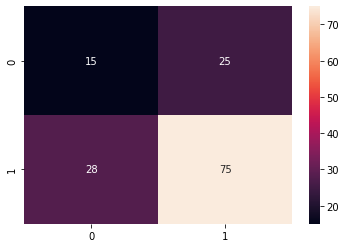

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(y_test,y_pred)

In [75]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.6293706293706294
0.75
0.7281553398058253
0.7389162561576353


**K Nearest Neighbors Algorithm**

In [66]:
x_train.shape

(427, 10)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=21,metric='minkowski')
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [68]:
knn_y_pred=knn_classifier.predict(x_test)

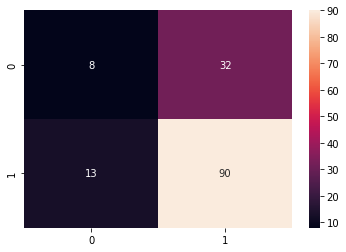

In [69]:
from sklearn.metrics import confusion_matrix
knn_cm=confusion_matrix(y_test,knn_y_pred)
sns.heatmap(knn_cm, annot= True)

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test,knn_y_pred))
print(recall_score(y_test,knn_y_pred))
print(f1_score(y_test,knn_y_pred))

0.6853146853146853
0.7377049180327869
0.8737864077669902
0.7999999999999999


**SVM**

In [71]:
from sklearn.svm import SVC
svm_classifier=SVC(kernel='rbf',random_state=0)
svm_classifier.fit(x_train,y_train)

SVC(random_state=0)

In [72]:
svm_y_pred=svm_classifier.predict(x_test)

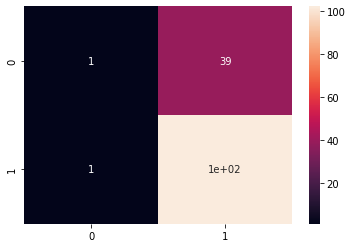

In [73]:
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(y_test,svm_y_pred)
sns.heatmap(svm_cm,annot=True)

In [77]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test,svm_y_pred))
print(recall_score(y_test,svm_y_pred))
print(f1_score(y_test,svm_y_pred))

0.7202797202797203
0.723404255319149
0.9902912621359223
0.8360655737704918


**Artificial Neural Network**

In [78]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [79]:
classifier=Sequential()
classifier.add(Dense(units=400,activation='relu',input_dim=10))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=400,activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=1,activation='sigmoid'))

In [80]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
classifier.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 0.5724 - accuracy: 0.6932
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5239 - accuracy: 0.6956
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5028 - accuracy: 0.7166
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4948 - accuracy: 0.7166
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4872 - accuracy: 0.7237
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4831 - accuracy: 0.7237
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.7424
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.7588
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4601 - accuracy: 0.7611
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4587 - accuracy: 0.7518
Epoch 11/

In [82]:
ann_y_pred=classifier.predict(x_test)

5/5 [==============================] - 0s 3ms/step


In [83]:
ann_y_pred[0]

array([0.84724826], dtype=float32)

In [84]:
ann_y_pred = ann_y_pred >=0.5

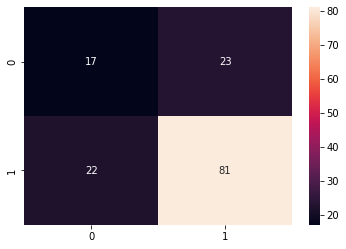

In [85]:
from sklearn.metrics import confusion_matrix
ann_cm=confusion_matrix(y_test,ann_y_pred)
sns.heatmap(ann_cm,annot=True)

In [86]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test,ann_y_pred))
print(precision_score(y_test,ann_y_pred))
print(recall_score(y_test,ann_y_pred))
print(recall_score(y_test,ann_y_pred))

0.6853146853146853
0.7788461538461539
0.7864077669902912
0.7864077669902912


**saving the models**

In [ ]:
import pickle
pickle.dump(knn_classifier,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))